## Adding the kaggle.json file to the directory

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"darshanbhiwapurkar","key":"89cba4b74ce16f426136485d27874e8f"}'}

## Copying the kaggle.json file into the kaggle directory

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

## Creating the Directory for Dataset to load

In [3]:
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


## Searching the Dataset in kaggle

In [ ]:
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34          73216        906  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11           9535        239  1.0              
eunjurho/german-traffic-sign-recognition-benchmark-cropped         german_traffic_sign_recognition_benchmark_cropped  206MB  2019-11-10 15:22:13            338          8  0.75             
bhavinmoriya/german-traffic-sign-recognition-bench

## Downloading the required Dataset

In [4]:
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd .. 

100% 612M/612M [00:16<00:00, 42.0MB/s]
100% 612M/612M [00:16<00:00, 39.4MB/s]
/content


## Unzipping the Dataset 

In [5]:
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

## Removing the unwanted datasets 

In [6]:
!rm -rf /content/meta
!rm -rf /content/test
!rm -rf /content/train
!rm -rf /content/Meta
!rm /content/Meta.csv

## Loading the Libraries

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

## Visualizing the Images in the Dataset

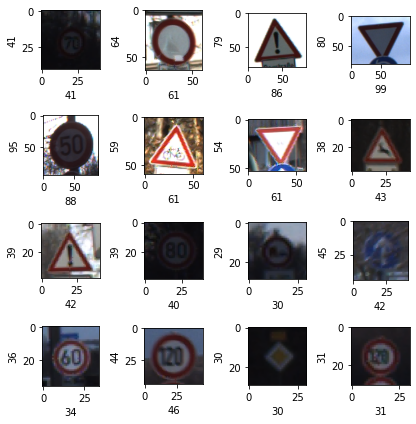

In [8]:
plt.figure(figsize=(6,6))
path = '/content/Test'
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path+'/'+random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10) # width of the image
  plt.ylabel(rand_img.shape[0], fontsize=10) # height of the image

## Getting the Height and Width of all the images for calculating the mean as all images contain different sizes

In [9]:
dim1 = []
dim2 = []
for i in range(0,43):
  labels = "/content/Train"+f"/{i}"
  image_path = os.listdir(labels)
  for x in image_path:
    img = imread(labels+'/'+x)
    dim1.append(img.shape[0]) #height
    dim2.append(img.shape[1]) #width

print(len(dim1), len(dim2))

39209 39209


## Calculating the mean height and Width of the Images

In [10]:
print(f"Average Mean Height of Images is {np.round(np.mean(dim1),2)} and Average Width of the Images is {np.round(np.mean(dim2),2)}")

Average Mean Height of Images is 50.33 and Average Width of the Images is 50.84


## Resizing all the Images to Average size

In [11]:
images = []
label_id = []
for i in range(43):
  labels = "/content/Train"+f"/{i}"
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels+"/"+ x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)
print(len(images), len(label_id))

39209 39209


## Converting images into array

In [12]:
images = np.array(images)
# Normalizing the images between 0 to 1
images = images/255

## Checking the shape of the images

In [14]:
images.shape

(39209, 50, 50, 3)

## Converting the label_id into array

In [13]:
label_id = np.array(label_id)

In [52]:
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
dtype: int64

## Converting data into train and validation data

In [16]:
X_train, X_val, y_train, y_val = train_test_split(images, label_id, test_size = 0.2, random_state=42)

In [17]:
print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(31367, 50, 50, 3) (31367,) (7842, 50, 50, 3) (7842,)


In [18]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [21]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=X_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

In [22]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)       

In [23]:
h = model.fit(X_train, y_train, epochs=50, batch_size=128, validation_data=(X_val, y_val), verbose=2)

Epoch 1/50
246/246 - 13s - loss: 2.3697 - accuracy: 0.3396 - val_loss: 1.1504 - val_accuracy: 0.7057 - 13s/epoch - 51ms/step
Epoch 2/50
246/246 - 4s - loss: 1.0727 - accuracy: 0.6616 - val_loss: 0.4386 - val_accuracy: 0.9022 - 4s/epoch - 17ms/step
Epoch 3/50
246/246 - 4s - loss: 0.7026 - accuracy: 0.7726 - val_loss: 0.2842 - val_accuracy: 0.9366 - 4s/epoch - 17ms/step
Epoch 4/50
246/246 - 4s - loss: 0.5504 - accuracy: 0.8198 - val_loss: 0.1671 - val_accuracy: 0.9640 - 4s/epoch - 17ms/step
Epoch 5/50
246/246 - 4s - loss: 0.4705 - accuracy: 0.8466 - val_loss: 0.1325 - val_accuracy: 0.9735 - 4s/epoch - 18ms/step
Epoch 6/50
246/246 - 4s - loss: 0.4092 - accuracy: 0.8664 - val_loss: 0.1070 - val_accuracy: 0.9802 - 4s/epoch - 18ms/step
Epoch 7/50
246/246 - 4s - loss: 0.3612 - accuracy: 0.8821 - val_loss: 0.0895 - val_accuracy: 0.9821 - 4s/epoch - 17ms/step
Epoch 8/50
246/246 - 4s - loss: 0.3249 - accuracy: 0.8931 - val_loss: 0.0789 - val_accuracy: 0.9844 - 4s/epoch - 18ms/step
Epoch 9/50
246

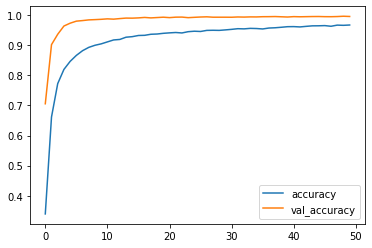

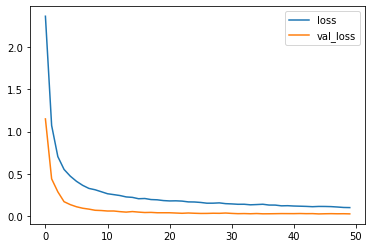

In [24]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

## Setting the test images path and Scaling the images same as train images

In [ ]:
!rm /content/Test/GT-final_test.csv

In [33]:
test_path = '/content/Test'
def scaling(test_images, test_path):
  images= []
  images_path = test_images
  for x in images_path:
    img = Image.open(test_path+"/"+x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
  images = np.array(images)
  images = images/255
  return images

rm: cannot remove '/content/Test/GT-final_test.csv': No such file or directory


In [34]:
test_images = scaling(sorted(os.listdir(test_path)), test_path)

In [36]:
test = pd.read_csv('Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [41]:
y_pred = model.predict(test_images)

395/395 [==============================] - 1s 3ms/step


In [48]:
x = []
for i in y_pred:
  x.append(np.argmax(i))

In [53]:
all_labels = ['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
              'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit(80km/h)', 'Speed limit (100km/h)',
              'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metrics tons',
              'Right-of-way at the next intersection','Priority road', 'Yield', 'Stop', 'No vehicle',
              'Vehicle over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left',
              'Dangerous curve to the right', 'Double curve', 'Bumpy Road', 'Slippery Road', 'Road narrows to the right',
              'Road work','Traffic Signals', 'Pedestrians', 'Chidren Crossing', 'Bicycle Crossing', 'Beware of ice/snow',
              'Wild Animals Crossing', 'End of all speeds and crossing limits', 'Turn Right Ahead', 'Turn Left Ahead',
              'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 
              'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric']

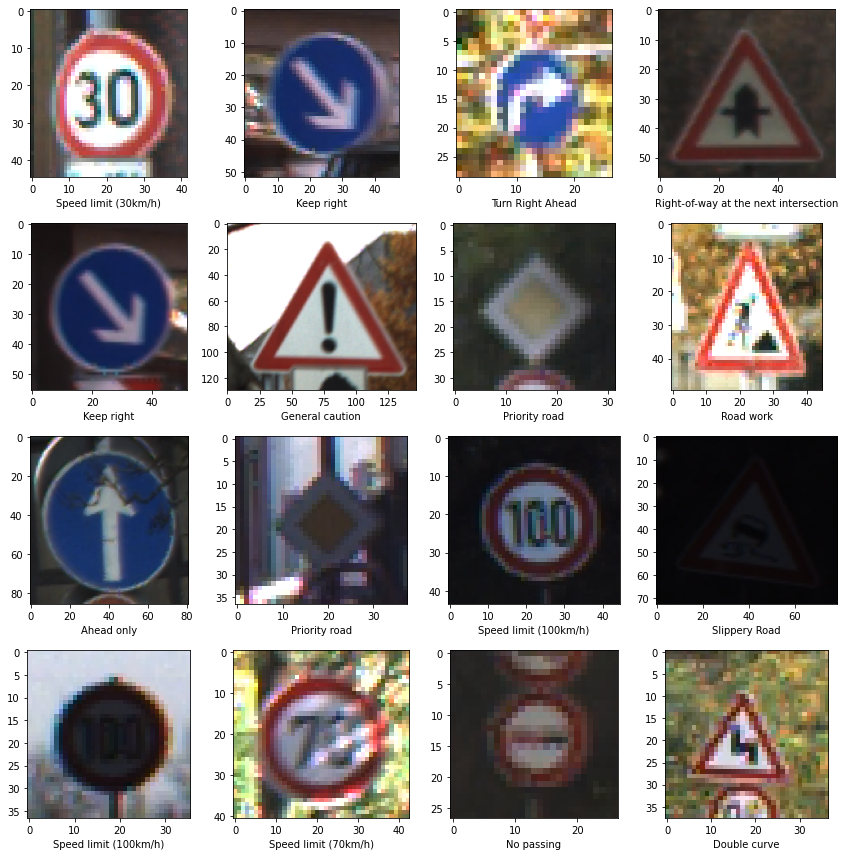

In [69]:
plt.figure(figsize=(12,12))
for i in range(1, 17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  img = Image.open(test['Path'][i])
  plt.imshow(img)
  plt.xlabel(all_labels[x[i]])

## Conclusion

#### We started with downloading the dataset, preprocessing it, created the model and found out the predictions using the model. During preprocessing we found out that this dataset has 43 classes. Model reached an accuracy of 98%+ in just 50 epochs, we can further optimize the model using hyper parameter tuning and reach a higher accuracy

## Scope

#### This model can be used in self driving cars which will enable them to automatically recognize traffic signs similarly the driver alert system inside cars will help by understanding the traffic signs around them